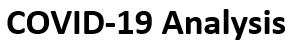

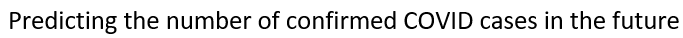

Importing Modules

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn.preprocessing import PolynomialFeatures

Loading Data Set

In [153]:
db = 'https://raw.githubusercontent.com/DRK-02/COVID-19-Analysis/main/Data_Set.csv'
df = pd.read_csv(db)

In [154]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10671 entries, 0 to 10670
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              10671 non-null  int64  
 1   ObservationDate  10671 non-null  object 
 2   Province/State   5715 non-null   object 
 3   Country/Region   10671 non-null  object 
 4   Last Update      10671 non-null  object 
 5   Confirmed        10671 non-null  float64
 6   Deaths           10671 non-null  float64
 7   Recovered        10671 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 667.1+ KB


Null Values in All Columns

In [156]:
df.isna().sum()

SNo                   0
ObservationDate       0
Province/State     4956
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

Data Set Size

In [157]:
df.shape

(10671, 8)

Data Set Description

In [158]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,10671.000000,10671.000000,10671.000000,10671.000000
mean,5336.000000,993.821666,40.667229,289.508481
std,3080.596695,6268.835379,398.618024,3010.809184
min,1.000000,0.000000,0.000000,0.000000
25%,2668.500000,3.000000,0.000000,0.000000
50%,5336.000000,31.000000,0.000000,0.000000
75%,8003.500000,229.000000,2.000000,14.000000
max,10671.000000,105792.000000,12428.000000,63153.000000


Columns

In [159]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

Data Set Analysis

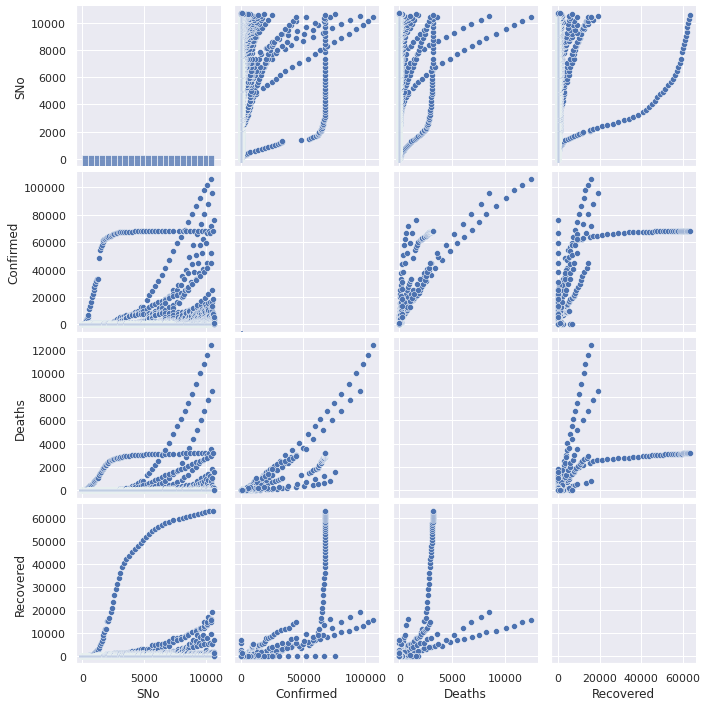

In [160]:
sns.pairplot(df)

Distribution of Confirmed Cases along Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


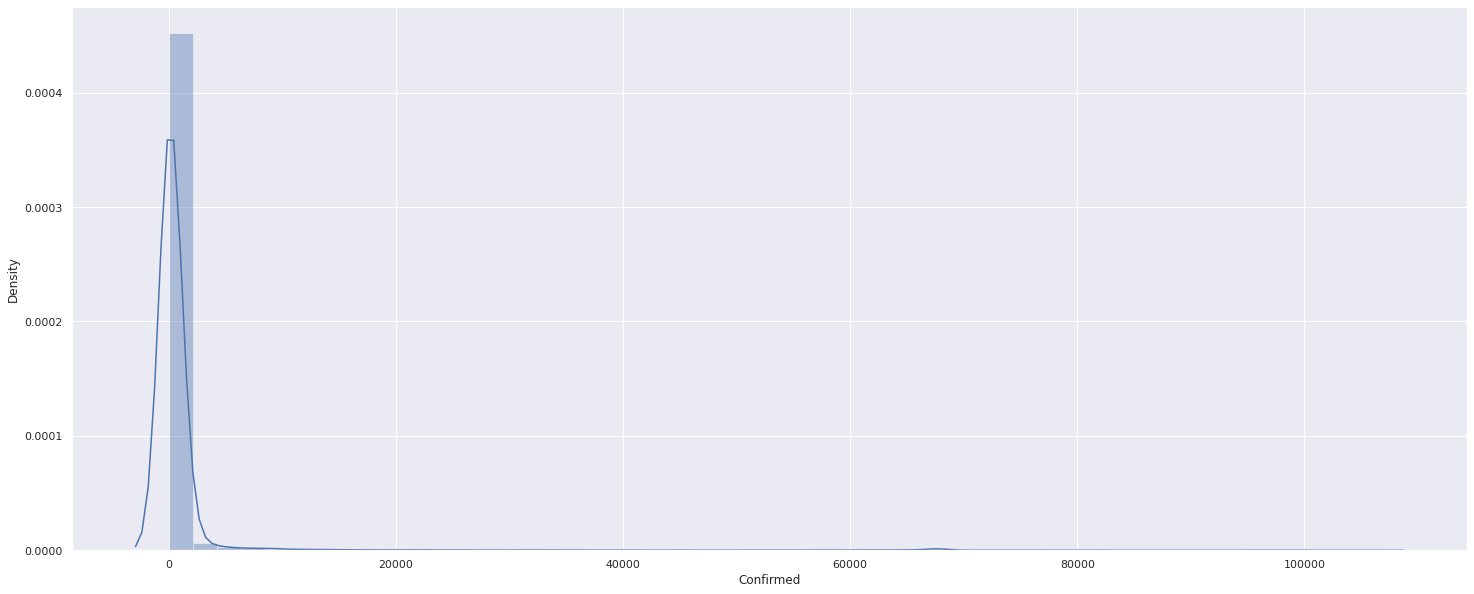

In [161]:
sns.distplot(df['Confirmed'])

Heatmap for Correlation of Dataset

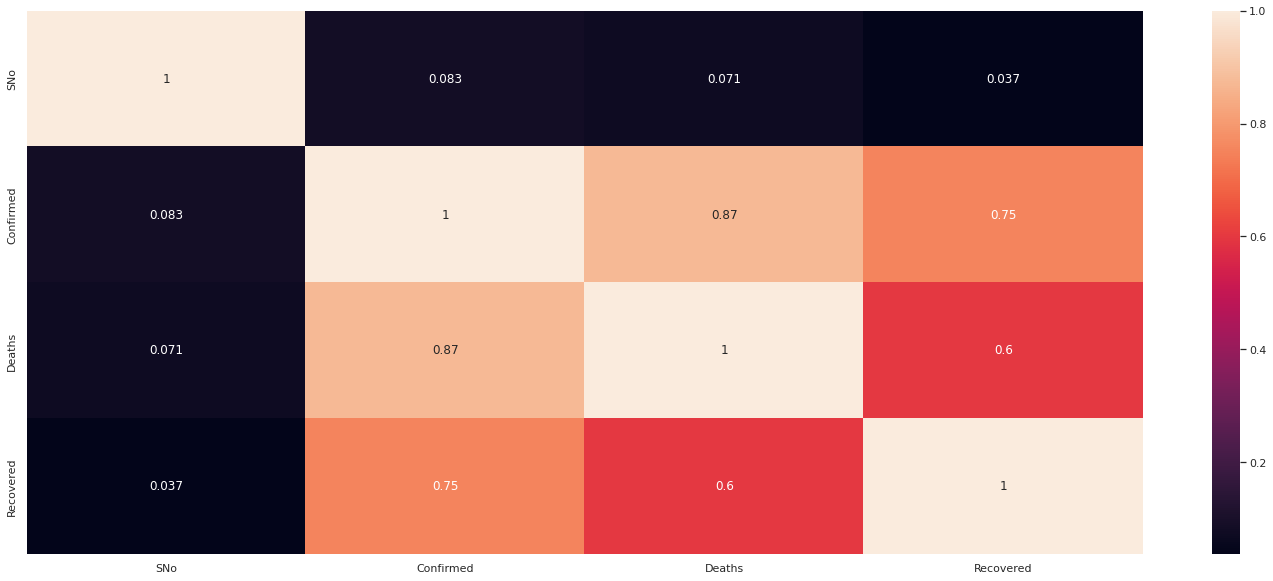

In [162]:
sns.heatmap(df.corr(), annot = True)

Training a Linear Regression Model

In [163]:
x = df[['Deaths', 'Recovered']]
y = df['Confirmed']

In [164]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

Creating Linear Regression Model

In [165]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

Intercept for Predictions

In [166]:
print(lr.intercept_)

365.23229275317476


Coefficient of Predictions

In [167]:
lr.coef_

array([10.17421459,  0.76114142])

Joining Coefficient with Features

In [168]:
cdf = pd.DataFrame(lr.coef_, x.columns, columns = ['coeff'])
cdf

,coeff
Deaths,10.174215
Recovered,0.761141


Predicting Models for Test Dataset

In [169]:
predictions = lr.predict(x_test)

Plotting Predictions

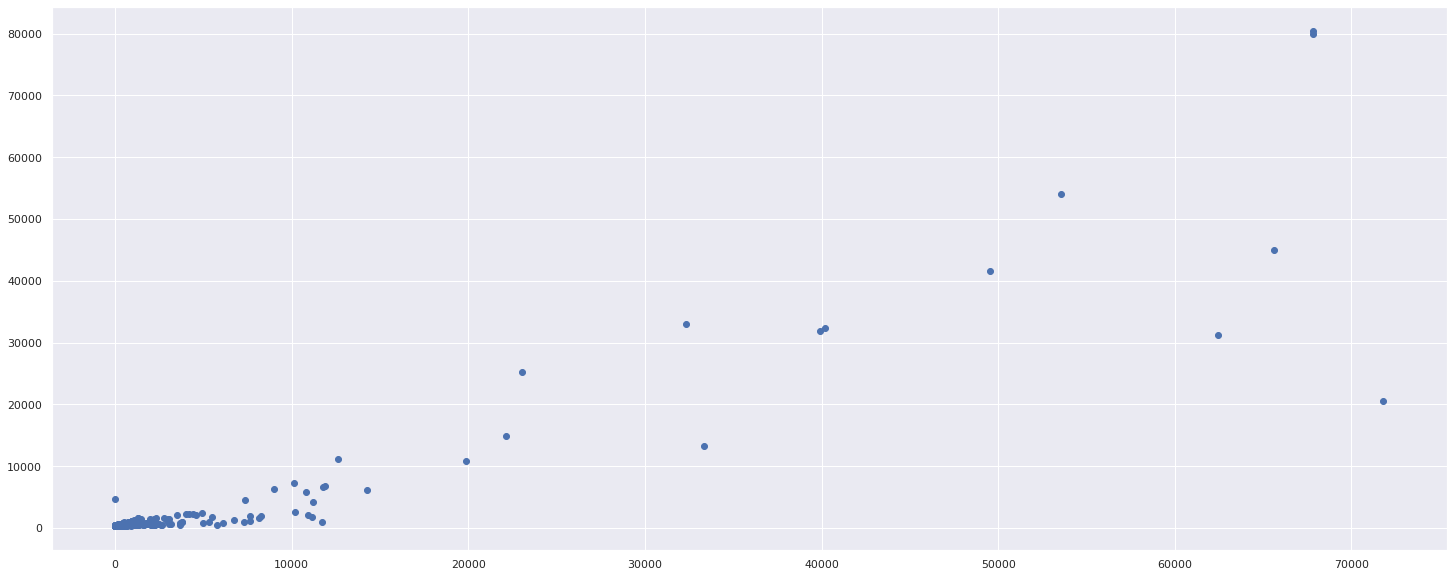

In [170]:
plt.scatter(y_test, predictions)

Residuals

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


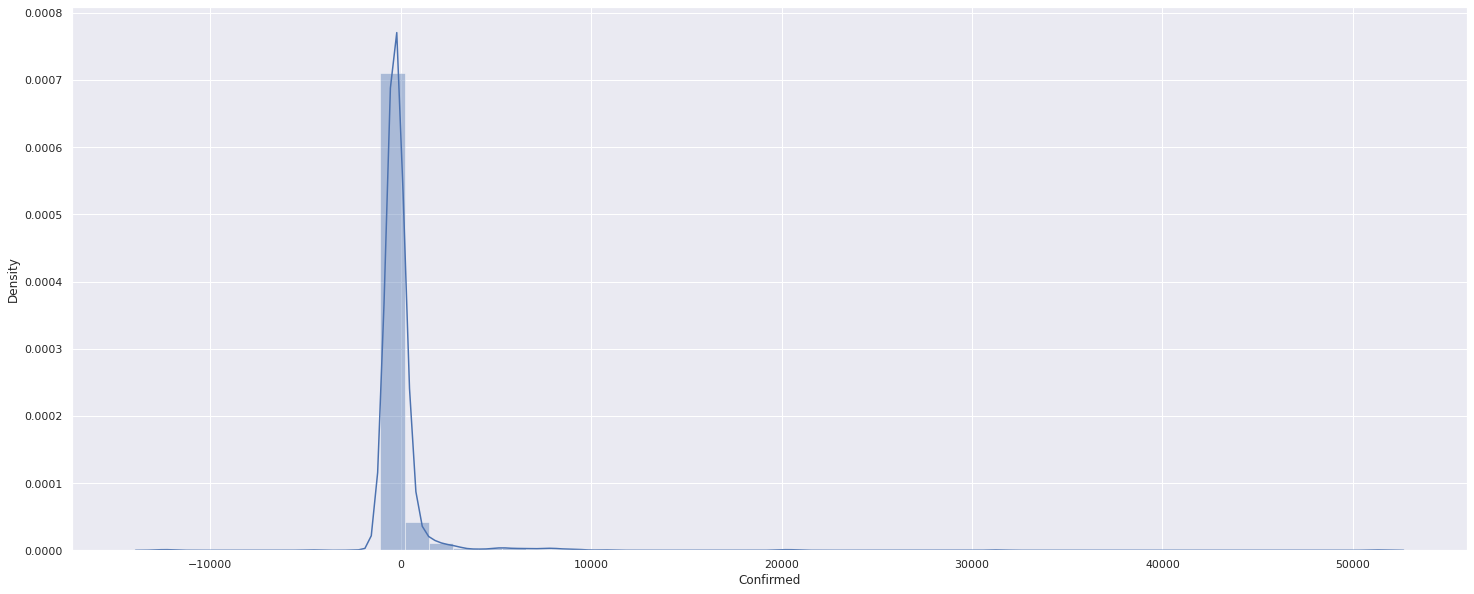

In [171]:
sns.distplot((y_test-predictions))

Mean Squared Error, Mean Absolute Error, Root Mean Squared Error

In [172]:
print(f'MSE: {mean_squared_error(y_test, predictions)}')
print(f'MAE: {mean_absolute_error(y_test, predictions)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')

MSE: 3936523.642491116
MAE: 553.4042496585874
RMSE: 1984.067449078059


Accuracy

In [173]:
print(f'Accuaracy: {r2_score(y_test, predictions) * 100}')
acc = []

Accuaracy: 82.65756186494013


#Linear Regression

##Prediction of Covid Cases using Deaths

MSE: 8990443.965831583
MAE: 725.0237548090743
RMSE: 2998.406904646463
Accuaracy: 74.93349321529216


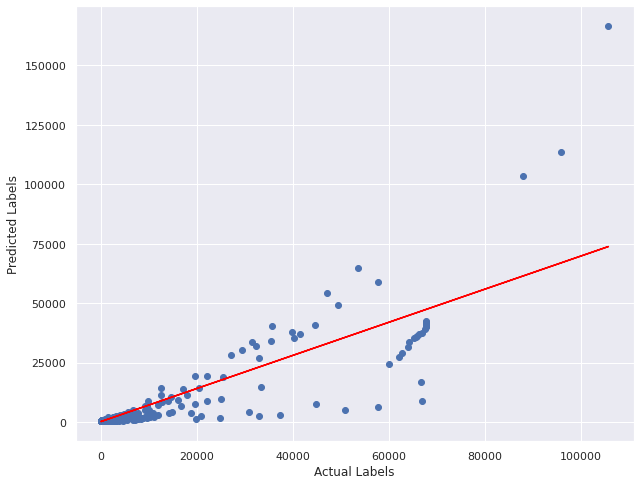

In [174]:
x = df[['Deaths']]
y = df['Confirmed']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.42)

lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
acc.append(r2_score(y_test, predictions) * 100)

print(f'''MSE: {mean_squared_error(y_test, predictions)}
MAE: {mean_absolute_error(y_test, predictions)}
RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}
Accuaracy: {r2_score(y_test, predictions) * 100}''')

plt.subplots(figsize = (10, 8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = 'red')
plt.show()

##Prediction of Covid Cases using Recovered Cases

MSE: 17107267.623989373
MAE: 1016.4271535225581
RMSE: 4136.093280378161
Accuaracy: 58.535080088174276


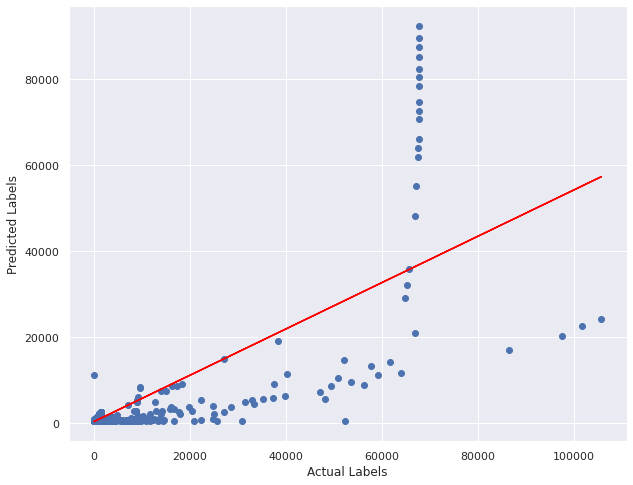

In [175]:
x = df[['Recovered']]
y = df['Confirmed']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.42)

lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
acc.append(r2_score(y_test, predictions) * 100)

print(f'''MSE: {mean_squared_error(y_test, predictions)}
MAE: {mean_absolute_error(y_test, predictions)}
RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}
Accuaracy: {r2_score(y_test, predictions) * 100}''')

plt.subplots(figsize = (10, 8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = 'red')
plt.show()

##Prediction of Covid Cases using Deaths & Recovered Cases

MSE: 4252617.872376442
MAE: 556.0087465278118
RMSE: 2062.1876423779777
Accuaracy: 87.1442876685698


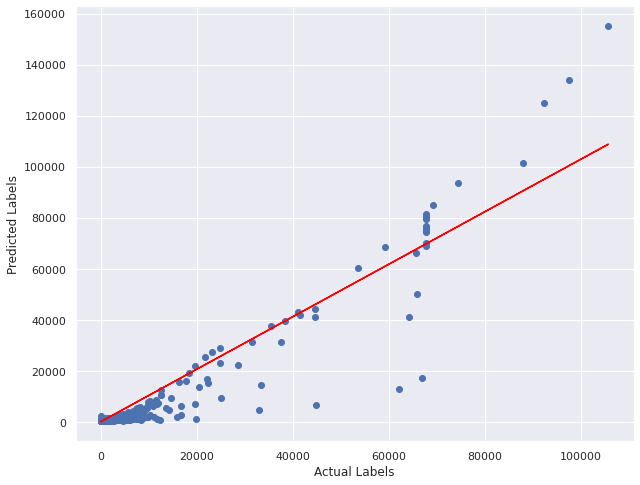

In [176]:
x = df[['Deaths', 'Recovered']]
y = df['Confirmed']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.42)

lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
acc.append(r2_score(y_test, predictions) * 100)

print(f'''MSE: {mean_squared_error(y_test, predictions)}
MAE: {mean_absolute_error(y_test, predictions)}
RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}
Accuaracy: {r2_score(y_test, predictions) * 100}''')

plt.subplots(figsize = (10, 8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = 'red')
plt.show()

#Polynomial Regression

## 2nd Degree

### Prediction of Covid Cases using Deaths


MSE: 9288067.41049415
MAE: 764.1437036014005
RMSE: 3047.6330833114
Accuaracy: 75.99774108665976


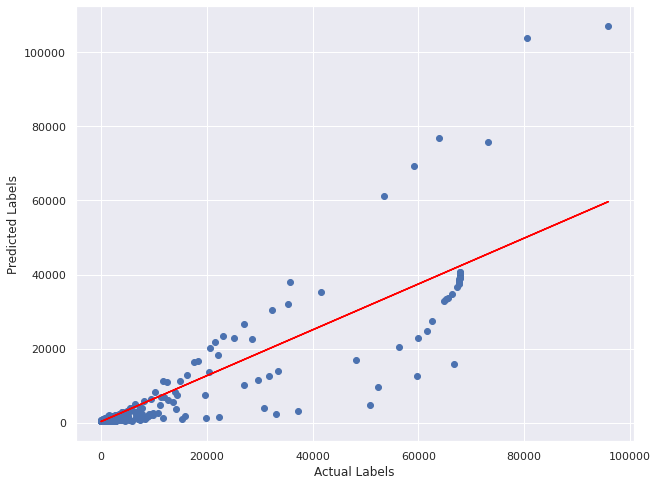

In [177]:
x = df[['Deaths']]
y = df['Confirmed']

poly_function = PolynomialFeatures(degree = 2)
poly_features = poly_function.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.42)

lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
acc.append(r2_score(y_test, predictions) * 100)

print(f'''MSE: {mean_squared_error(y_test, predictions)}
MAE: {mean_absolute_error(y_test, predictions)}
RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}
Accuaracy: {r2_score(y_test, predictions) * 100}''')

plt.subplots(figsize = (10, 8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = 'red')
plt.show()

###Prediction of Covid Cases using Recovered Cases

MSE: 18579271.578285567
MAE: 1025.477007935619
RMSE: 4310.367916812388
Accuaracy: 55.81388824061588


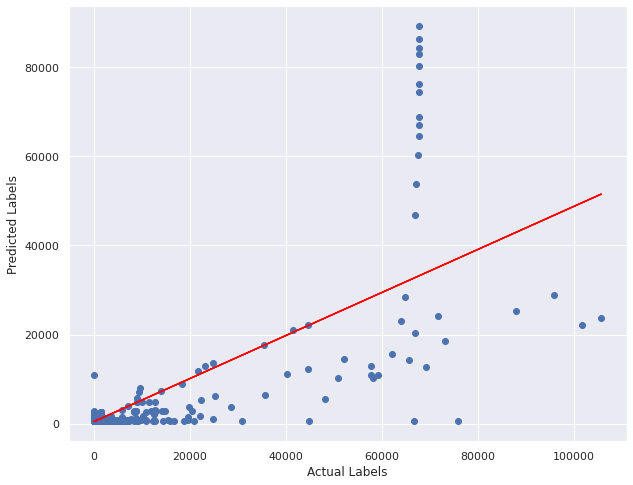

In [178]:
x = df[['Recovered']]
y = df['Confirmed']

poly_function = PolynomialFeatures(degree = 2)
poly_features = poly_function.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.42)

lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
acc.append(r2_score(y_test, predictions) * 100)

print(f'''MSE: {mean_squared_error(y_test, predictions)}
MAE: {mean_absolute_error(y_test, predictions)}
RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}
Accuaracy: {r2_score(y_test, predictions) * 100}''')

plt.subplots(figsize = (10, 8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = 'red')
plt.show()

###Prediction of Covid Cases using Deaths & Recovered Cases

MSE: 5999438.660922604
MAE: 616.0429390505481
RMSE: 2449.375157243701
Accuaracy: 84.56690065073236


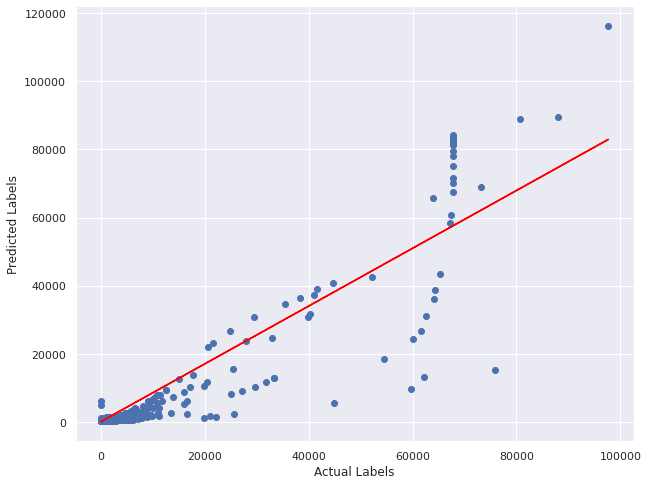

In [179]:
x = df[['Deaths', 'Recovered']]
y = df['Confirmed']

poly_function = PolynomialFeatures(degree = 2)
poly_features = poly_function.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.42)

lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
acc.append(r2_score(y_test, predictions) * 100)

print(f'''MSE: {mean_squared_error(y_test, predictions)}
MAE: {mean_absolute_error(y_test, predictions)}
RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}
Accuaracy: {r2_score(y_test, predictions) * 100}''')

plt.subplots(figsize = (10, 8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = 'red')
plt.show()

## 3rd Degree

### Prediction of Covid Cases using Deaths

MSE: 8824039.54217632
MAE: 742.8078255446638
RMSE: 2970.5284954324743
Accuaracy: 74.55777167065445


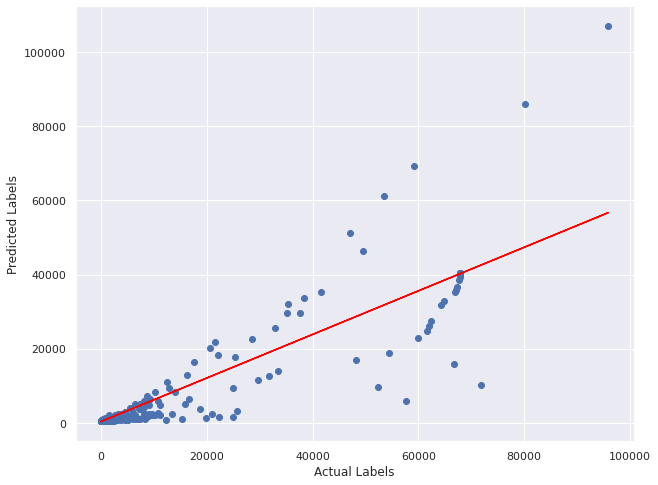

In [180]:
x = df[['Deaths']]
y = df['Confirmed']

poly_function = PolynomialFeatures(degree = 3)
poly_features = poly_function.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.42)

lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
acc.append(r2_score(y_test, predictions) * 100)

print(f'''MSE: {mean_squared_error(y_test, predictions)}
MAE: {mean_absolute_error(y_test, predictions)}
RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}
Accuaracy: {r2_score(y_test, predictions) * 100}''')

plt.subplots(figsize = (10, 8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = 'red')
plt.show()

### Prediction of Covid Cases using Recovered Cases

MSE: 16437350.105183156
MAE: 1000.6996045503579
RMSE: 4054.300199193833
Accuaracy: 58.26527903040643


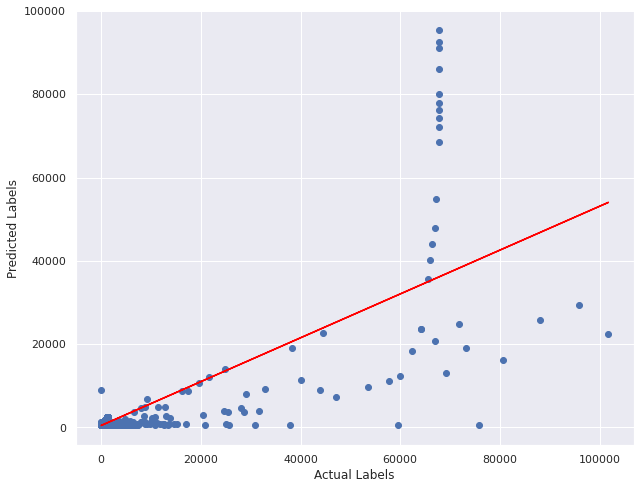

In [181]:
x = df[['Recovered']]
y = df['Confirmed']

poly_function = PolynomialFeatures(degree = 3)
poly_features = poly_function.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.42)

lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
acc.append(r2_score(y_test, predictions) * 100)

print(f'''MSE: {mean_squared_error(y_test, predictions)}
MAE: {mean_absolute_error(y_test, predictions)}
RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}
Accuaracy: {r2_score(y_test, predictions) * 100}''')

plt.subplots(figsize = (10, 8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = 'red')
plt.show()

### Prediction of Covid Cases using Deaths & Recovered Cases

MSE: 7326030.7869710475
MAE: 615.332106021421
RMSE: 2706.664143733213
Accuaracy: 83.54862753587426


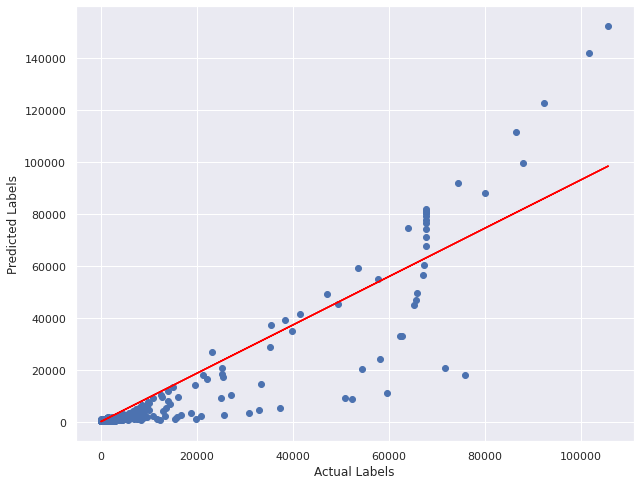

In [182]:
x = df[['Deaths', 'Recovered']]
y = df['Confirmed']

poly_function = PolynomialFeatures(degree = 3)
poly_features = poly_function.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.42)

lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
acc.append(r2_score(y_test, predictions) * 100)

print(f'''MSE: {mean_squared_error(y_test, predictions)}
MAE: {mean_absolute_error(y_test, predictions)}
RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}
Accuaracy: {r2_score(y_test, predictions) * 100}''')

plt.subplots(figsize = (10, 8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = 'red')
plt.show()

## 4th Degree

### Prediction of Covid Cases using Deaths

MSE: 8268351.881812011
MAE: 701.2568551865303
RMSE: 2875.4742012078655
Accuaracy: 74.67550969080426


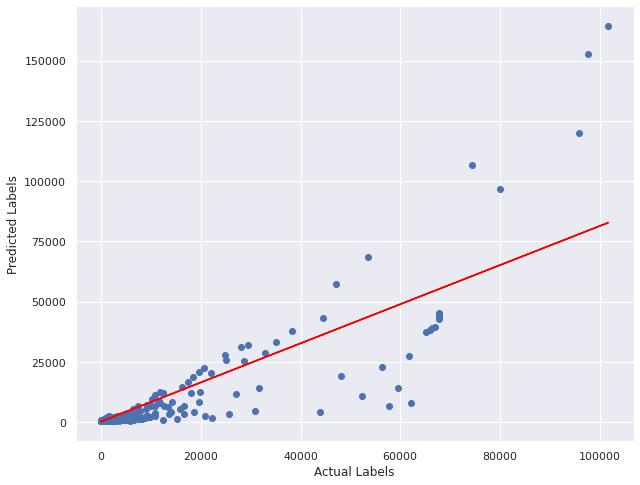

In [183]:
x = df[['Deaths']]
y = df['Confirmed']

poly_function = PolynomialFeatures(degree = 4)
poly_features = poly_function.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.42)

lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
acc.append(r2_score(y_test, predictions) * 100)

print(f'''MSE: {mean_squared_error(y_test, predictions)}
MAE: {mean_absolute_error(y_test, predictions)}
RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}
Accuaracy: {r2_score(y_test, predictions) * 100}''')

plt.subplots(figsize = (10, 8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = 'red')
plt.show()

###Prediction of Covid Cases using Recovered Cases

MSE: 13973155.581464464
MAE: 982.2400565954631
RMSE: 3738.068429211063
Accuaracy: 57.09700838354546


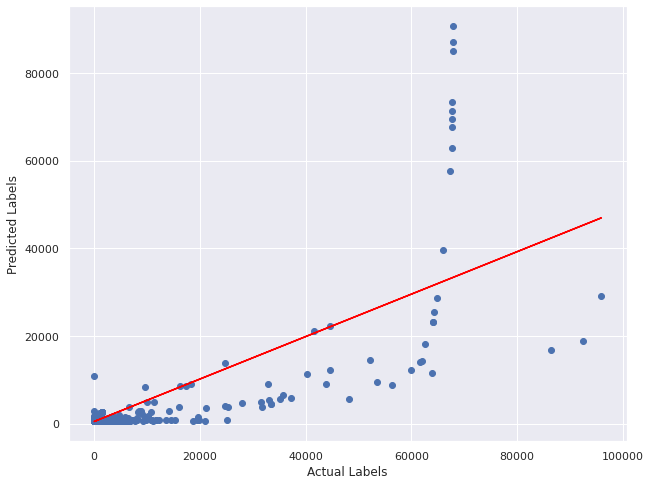

In [184]:
x = df[['Recovered']]
y = df['Confirmed']

poly_function = PolynomialFeatures(degree = 4)
poly_features = poly_function.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.42)

lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
acc.append(r2_score(y_test, predictions) * 100)

print(f'''MSE: {mean_squared_error(y_test, predictions)}
MAE: {mean_absolute_error(y_test, predictions)}
RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}
Accuaracy: {r2_score(y_test, predictions) * 100}''')

plt.subplots(figsize = (10, 8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = 'red')
plt.show()

###Prediction of Covid Cases using Deaths & Recovered Cases

MSE: 6743634.010478353
MAE: 623.5772829426493
RMSE: 2596.8507871031698
Accuaracy: 83.43872839611018


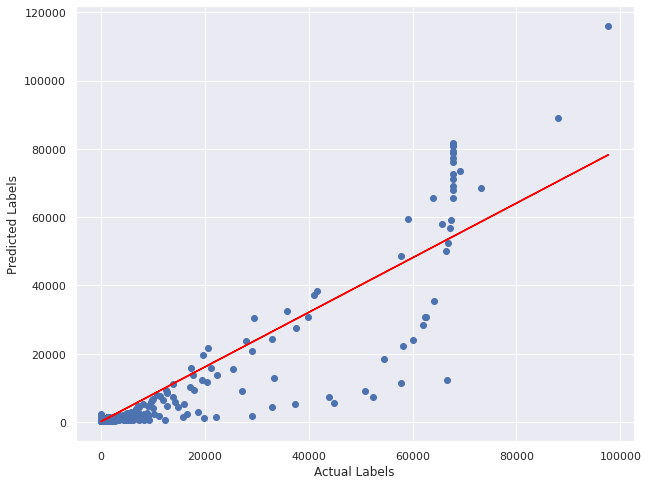

In [185]:
x = df[['Deaths', 'Recovered']]
y = df['Confirmed']

poly_function = PolynomialFeatures(degree = 4)
poly_features = poly_function.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.42)

lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
acc.append(r2_score(y_test, predictions) * 100)

print(f'''MSE: {mean_squared_error(y_test, predictions)}
MAE: {mean_absolute_error(y_test, predictions)}
RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}
Accuaracy: {r2_score(y_test, predictions) * 100}''')

plt.subplots(figsize = (10, 8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = 'red')
plt.show()

##5th Degree

###Prediction of Covid Cases using Deaths

MSE: 9332495.738944137
MAE: 724.023976993916
RMSE: 3054.9133766678456
Accuaracy: 77.01081049225994


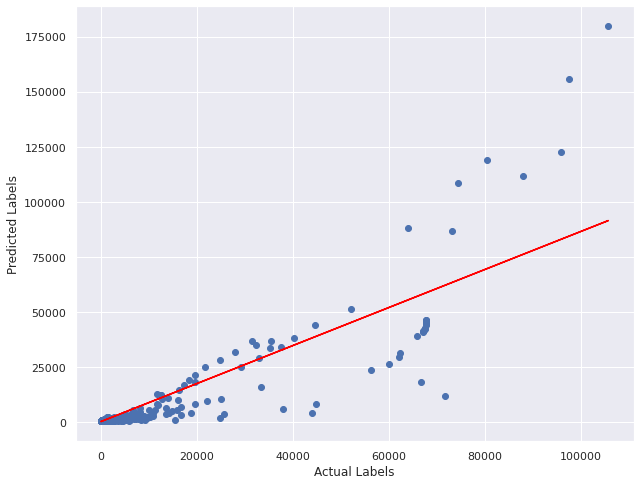

In [186]:
x = df[['Deaths']]
y = df['Confirmed']

poly_function = PolynomialFeatures(degree = 5)
poly_features = poly_function.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.42)

lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
acc.append(r2_score(y_test, predictions) * 100)

print(f'''MSE: {mean_squared_error(y_test, predictions)}
MAE: {mean_absolute_error(y_test, predictions)}
RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}
Accuaracy: {r2_score(y_test, predictions) * 100}''')

plt.subplots(figsize = (10, 8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = 'red')
plt.show()

###Prediction of Covid Cases using Recovered Cases

MSE: 18023949.08335476
MAE: 1012.5718973255897
RMSE: 4245.462175470977
Accuaracy: 54.18956787865539


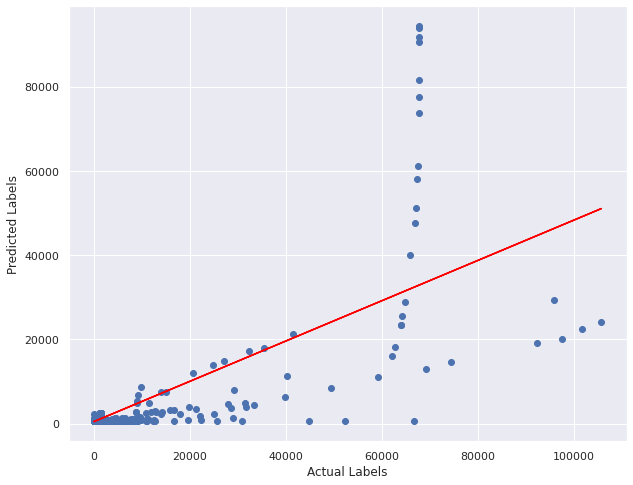

In [187]:
x = df[['Recovered']]
y = df['Confirmed']

poly_function = PolynomialFeatures(degree = 5)
poly_features = poly_function.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.42)

lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
acc.append(r2_score(y_test, predictions) * 100)

print(f'''MSE: {mean_squared_error(y_test, predictions)}
MAE: {mean_absolute_error(y_test, predictions)}
RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}
Accuaracy: {r2_score(y_test, predictions) * 100}''')

plt.subplots(figsize = (10, 8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = 'red')
plt.show()

###Prediction of Covid Cases using Deaths & Recovered Cases

MSE: 7619861.57978798
MAE: 642.3485407333668
RMSE: 2760.409676078531
Accuaracy: 84.12423062891105


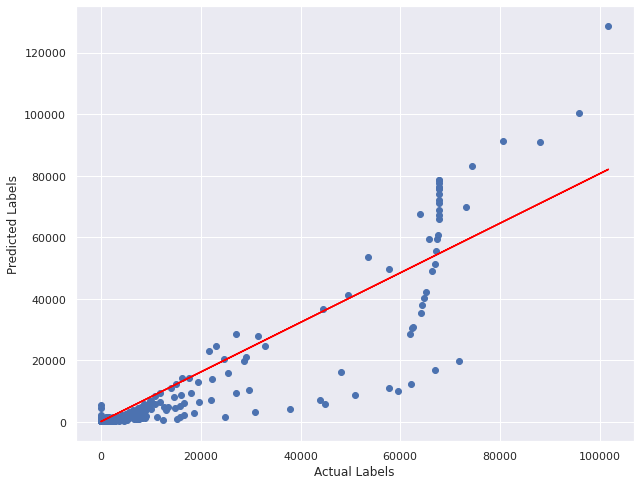

In [188]:
x = df[['Deaths', 'Recovered']]
y = df['Confirmed']

poly_function = PolynomialFeatures(degree = 5)
poly_features = poly_function.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.42)

lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
acc.append(r2_score(y_test, predictions) * 100)

print(f'''MSE: {mean_squared_error(y_test, predictions)}
MAE: {mean_absolute_error(y_test, predictions)}
RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}
Accuaracy: {r2_score(y_test, predictions) * 100}''')

plt.subplots(figsize = (10, 8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = 'red')
plt.show()

#Accuracy Comparison of All Models

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


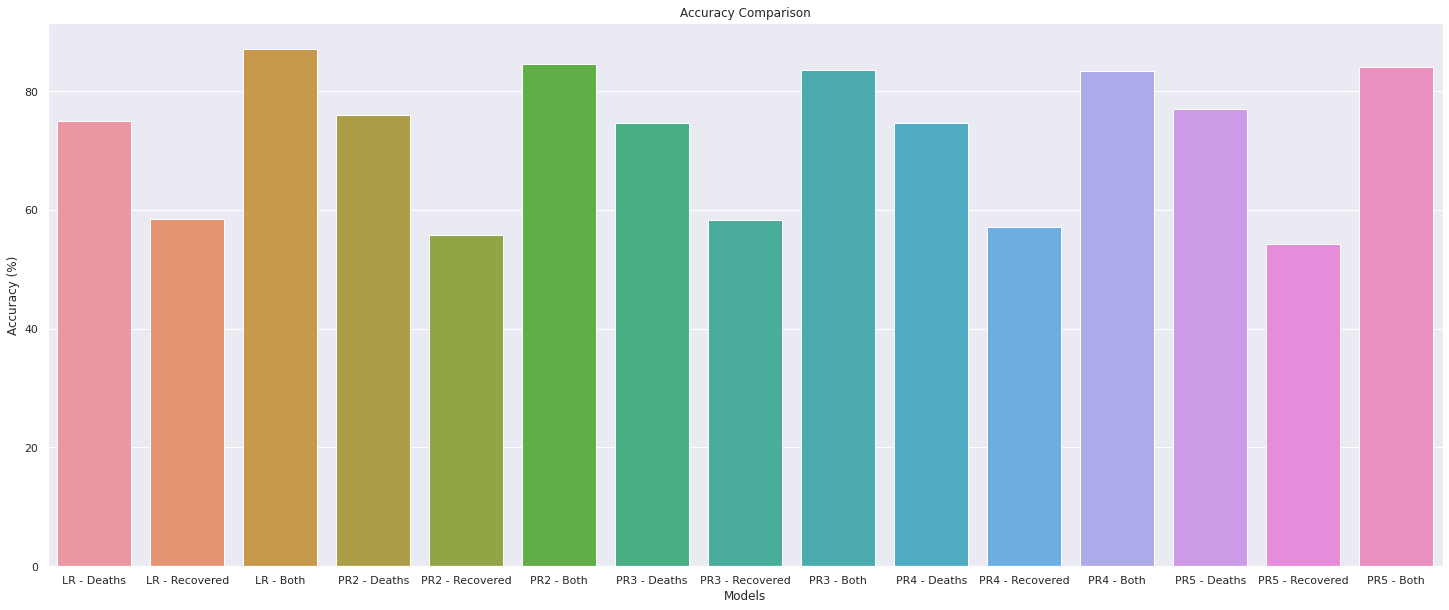

In [189]:
sns.set(rc = {'figure.figsize': (25, 10)})
sns.set_style('ticks')
sns.set(font_scale = 1)

x = ['LR - Deaths', 'LR - Recovered', 'LR - Both', 'PR2 - Deaths', 
     'PR2 - Recovered', 'PR2 - Both', 'PR3 - Deaths', 'PR3 - Recovered', 
     'PR3 - Both', 'PR4 - Deaths', 'PR4 - Recovered', 'PR4 - Both', 
     'PR5 - Deaths', 'PR5 - Recovered', 'PR5 - Both']
y = acc

bar_plot = sns.barplot(x, y)
bar_plot.set_xlabel('Models')
bar_plot.set_ylabel('Accuracy (%)')
bar_plot.set_title('Accuracy Comparison')
plt.show()

In [190]:
for i in range(len(x)):
  if y[i] == max(y):
    print(f'Best Model: {x[i]}\nAccuracy: {y[i]}')

Best Model: LR - Both
Accuracy: 87.1442876685698
